# Votos de Diputados Nacionales durante 2018

Utilizamos a R y algunos gráficos en Python para poder acceder a la base y ver las asistencias de Diputados Nacionales que representan, en este caso en concreto, a Mendoza.

In [45]:
#Comenzamos leyendo la base que descargamos desde la página oficial de Diputados (Datos Abiertos)
#Antes llamamos a las librerías que vamos a utilizar para leer, limpiar y graficar

library(readr)
library(dplyr)
library(ggplot2)


In [3]:
#Leemos la base


diputados_asistencia <- read_csv("C://Users/rpardo/Downloads/diputados.csv")

Parsed with column specification:
cols(
  Nombre = col_character(),
  ABSTENCION = col_integer(),
  AFIRMATIVO = col_integer(),
  Ausente = col_integer(),
  NEGATIVO = col_integer(),
  Presente = col_integer(),
  `%` = col_character(),
  `Total general` = col_integer(),
  Bloque = col_character()
)


In [39]:
#Conocemos la base con la que estamos trabajando

head(diputados_asistencia, n = 20)

Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Karina Banfi,0,57,0,48,105,"0,00%",105,Unión Cívica Radical
Sofia Brambilla,0,57,0,48,105,"0,00%",105,PRO
Silvia Gabriela Lospennato,0,57,0,48,105,"0,00%",105,PRO
Martin Maquieyra,0,56,0,49,105,"0,00%",105,PRO
Miguel Nanni,1,55,0,49,105,"0,00%",105,Unión Cívica Radical
Luis Mario Pastori,0,56,0,49,105,"0,00%",105,Unión Cívica Radical
Luis Alfonso Petri,0,56,0,49,105,"0,00%",105,Unión Cívica Radical
Carmen Polledo,0,56,0,49,105,"0,00%",105,PRO
Roxana Nahir Reyes,0,57,0,48,105,"0,00%",105,Unión Cívica Radical
Mirta Tundis,7,90,0,8,105,"0,00%",105,Federal Unidos por una Nueva Argentina


In [40]:
tail(diputados_asistencia, n = 15)

Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Oscar Alberto Macias,1,46,55,3,50,"52,38%",105,Justicialista
Francisco Abel Furlan,0,39,56,10,49,"53,33%",105,Frente para la Victoria - PJ
Hugo Orlando Infante,1,44,56,4,49,"53,33%",105,Frente Cívico por Santiago
Victoria Analia Donda Perez,1,39,57,8,48,"54,29%",105,Libres del Sur
Anabella Ruth Hers Cabral,0,16,57,32,48,"54,29%",105,PRO
Juan Mosqueda,1,45,57,2,48,"54,29%",105,Justicialista
Gladys Medina,3,40,58,4,47,"55,24%",105,Justicialista por Tucumán
Daniel Ricardo Kroneberger,0,28,62,15,43,"59,05%",105,Unión Cívica Radical
Daniel Scioli,1,33,65,6,40,"61,90%",105,Frente para la Victoria - PJ
Aida Beatriz Maxima Ayala,0,26,67,12,38,"63,81%",105,Unión Cívica Radical


In [6]:
#Conocemos nuestras variables, algunas categoricas, otras nominales. Esto es importante para saber como graficar luego

names(diputados_asistencia)

[1] "Nombre"        "ABSTENCION"    "AFIRMATIVO"    "Ausente"      
[5] "NEGATIVO"      "Presente"      "%"             "Total general"
[9] "Bloque"

In [7]:
#Conocemos la dimension de nuestra base

dim(diputados_asistencia)

[1] 257   9

In [11]:
#Tenemos 257 diputados nacionales individualizados en 9 variables
#Seguimos conociendo nuestra base de datos con Glimpse para saber con que tipo de datos y clases estamos trabajando. 
#Ahorramos tiempo, tambien podemos utilizar class()

glimpse(diputados_asistencia)


Observations: 257
Variables: 9
$ Nombre          <chr> "Karina Banfi", "Sofia Brambilla", "Silvia Gabriela...
$ ABSTENCION      <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, ...
$ AFIRMATIVO      <int> 57, 57, 57, 56, 55, 56, 56, 56, 57, 90, 57, 55, 56,...
$ Ausente         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...
$ NEGATIVO        <int> 48, 48, 48, 49, 49, 49, 49, 49, 48, 8, 48, 49, 48, ...
$ Presente        <int> 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 1...
$ `%`             <chr> "0,00%", "0,00%", "0,00%", "0,00%", "0,00%", "0,00%...
$ `Total general` <int> 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 1...
$ Bloque          <chr> "Unión Cívica Radical", "PRO", "PRO", "PRO", "Unión...


In [12]:
#Aca vamos a conocer los valores promedios, la mediana, primer y tercer cuartil (esto nos sirve por si queremos buscar outlers)
#También conocemos los valores maximos y minimos de cada variable
#Observen con detalle el valor maximo de ausente. Hubo un diputado que estuvo ausente 79 veces

summary(diputados_asistencia)

    Nombre            ABSTENCION       AFIRMATIVO       Ausente     
 Length:257         Min.   : 0.000   Min.   : 9.00   Min.   : 0.00  
 Class :character   1st Qu.: 0.000   1st Qu.:50.00   1st Qu.: 6.00  
 Mode  :character   Median : 1.000   Median :55.00   Median :14.00  
                    Mean   : 1.844   Mean   :57.28   Mean   :19.32  
                    3rd Qu.: 3.000   3rd Qu.:66.00   3rd Qu.:29.00  
                    Max.   :13.000   Max.   :94.00   Max.   :79.00  
    NEGATIVO        Presente           %             Total general  
 Min.   : 1.00   Min.   : 26.00   Length:257         Min.   : 40.0  
 1st Qu.:10.00   1st Qu.: 75.00   Class :character   1st Qu.:105.0  
 Median :21.00   Median : 91.00   Mode  :character   Median :105.0  
 Mean   :25.74   Mean   : 84.87                      Mean   :104.2  
 3rd Qu.:46.00   3rd Qu.: 99.00                      3rd Qu.:105.0  
 Max.   :49.00   Max.   :105.00                      Max.   :105.0  
    Bloque         
 Length:257   

In [13]:
#Vamos a identificar a ese diputado que votó "ausente" 79 veces, cifra record

diputados_asistencia %>%
   filter(Ausente == 79)

Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Mirta Ameliana Pastoriza,1,23,79,2,26,"75,24%",105,Frente Cívico por Santiago


In [15]:
#Ahora, vamos a identificar a los diputados que votaron mas veces de forma "afirmativa" siendo el numero maximo 94

diputados_asistencia %>%
    filter(AFIRMATIVO == 94)

Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Jose Luis Ramon,2,94,2,7,103,"1,90%",105,Partido Intransigente de Mendoza
Juan Jose Bahillo,4,94,3,4,102,"2,86%",105,Justicialista


In [16]:
#Aparece el diputado José Luis Ramón, representante del Partido Intransigente, ahora llamado Protectora Fuerza Política 
#Ahora busquemos a los diputados que votaron más veces de forma negativa por supuesto siempre basandonos en los valores arrojados
#la estadistica descriptiva que hicimos en pasos anteriores

diputados_asistencia %>%
  filter(NEGATIVO == 49)

Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Martin Maquieyra,0,56,0,49,105,"0,00%",105,PRO
Miguel Nanni,1,55,0,49,105,"0,00%",105,Unión Cívica Radical
Luis Mario Pastori,0,56,0,49,105,"0,00%",105,Unión Cívica Radical
Luis Alfonso Petri,0,56,0,49,105,"0,00%",105,Unión Cívica Radical
Carmen Polledo,0,56,0,49,105,"0,00%",105,PRO
Juan Aicega,0,55,1,49,104,"0,95%",105,PRO
Alicia Fregonese,0,55,1,49,104,"0,95%",105,PRO
Martin Osvaldo Hernandez,0,55,1,49,104,"0,95%",105,Unión Cívica Radical
Cornelia Schmidt Liermann,0,55,1,49,104,"0,95%",105,PRO
Facundo Garreton,0,54,2,49,103,"1,90%",105,PRO


In [33]:
#Aparece el Diputado Luis Petri de la UCR Mendoza
#Ahora busquemos por nombre a los otros diputados mendocinos para saber como votaron durante el año

diputados_asistencia %>%
  filter(Nombre == "Sebastian Bragagnolo")

mendocinos <- diputados_asistencia %>%
  filter(Nombre == "Luis Gustavo Borsani")

diputados_asistencia %>%
  filter(Nombre == "Guillermo Ramon Carmona")

diputados_asistencia %>%
  filter(Nombre == "Omar Chafi Felix")

diputados_asistencia %>%
  filter(Nombre == "Stella Maris Huczak")

diputados_asistencia %>%
  filter(Nombre == "Pedro Ruben Miranda")

diputados_asistencia %>%
  filter(Nombre == "Claudia Najul")

diputados_asistencia %>%
  filter(Nombre == "Federico Raul Zamarbide")


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Sebastian Bragagnolo,0,45,2,18,63,"3,08%",65,PRO


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Guillermo Ramon Carmona,2,73,8,22,97,"7,62%",105,Frente para la Victoria - PJ


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Omar Chafi Felix,2,53,41,9,64,"39,05%",105,Somos Mendoza


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Stella Maris Huczak,0,54,3,48,102,"2,86%",105,PRO


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Pedro Ruben Miranda,3,74,22,6,83,"20,95%",105,Justicialista


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Claudia Najul,1,54,4,46,101,"3,81%",105,Unión Cívica Radical


Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Federico Raul Zamarbide,1,49,9,46,96,"8,57%",105,Unión Cívica Radical


In [31]:
mendocinos

Nombre,ABSTENCION,AFIRMATIVO,Ausente,NEGATIVO,Presente,%,Total general,Bloque
Luis Gustavo Borsani,0,54,4,47,101,"3,81%",105,Unión Cívica Radical


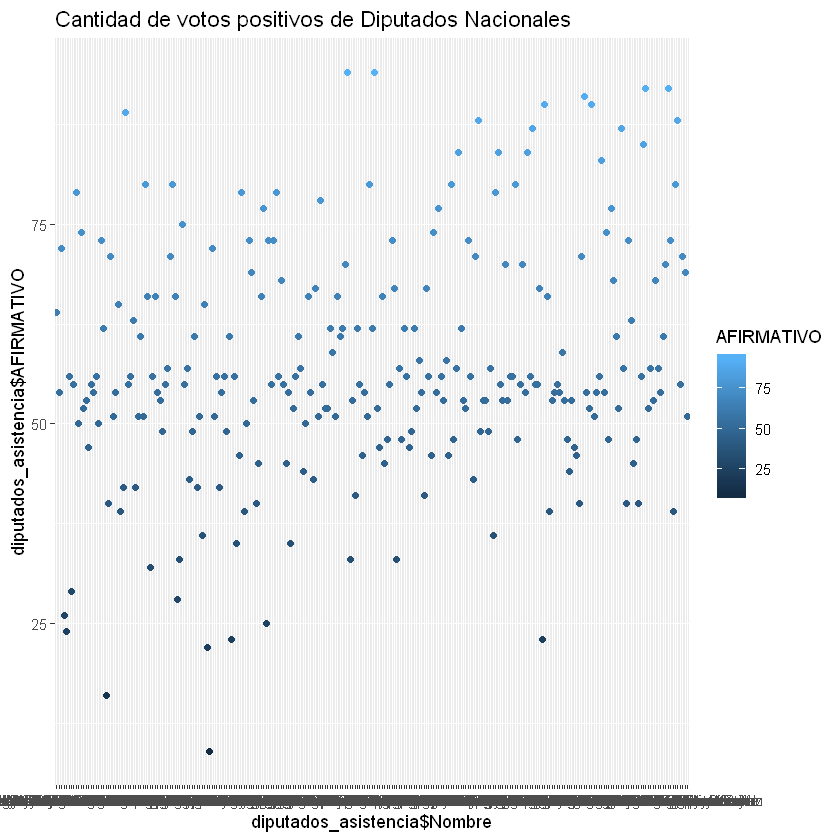

In [67]:
#Vamos a utilizar ggplot para graficar algunos datos generales con sus respectivas conclusiones

grafico <- ggplot(diputados_asistencia, aes(x = diputados_asistencia$Nombre , y = diputados_asistencia$AFIRMATIVO, color = AFIRMATIVO)) +
  geom_point() +
  ggtitle("Cantidad de votos positivos de Diputados Nacionales")

print(grafico)

#La gran mayoria de los diputados estuvieron entre los 50 y 75 votos positivos

   

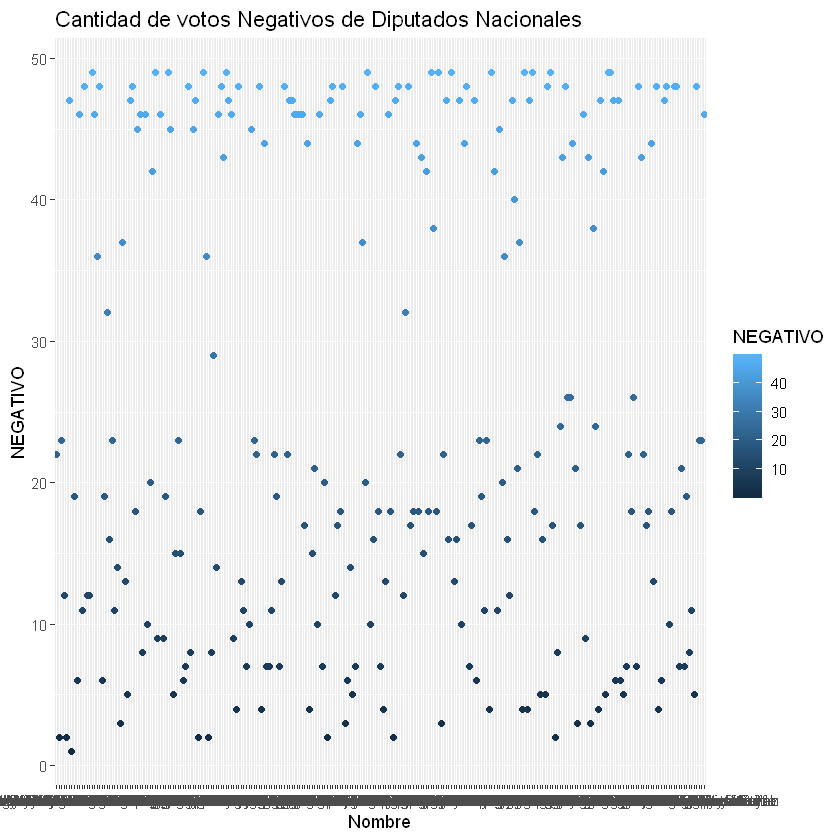

In [68]:
ggplot(diputados_asistencia, aes(x = Nombre , y = NEGATIVO, color = NEGATIVO)) +
  geom_point() +
  ggtitle("Cantidad de votos Negativos de Diputados Nacionales")

#Aca la muestra es mas dispersa. Algunos se ubican por encima de los 40 votos negativos mientras que la gran mayoria
#se ubica por debajo de los 20 votos

In [70]:
#Si estás con R Studio, ejecuta esta salida para obtener la base completa

View(diputados_asistencia)

ERROR: Error in View(diputados_asistencia): 'View()' not yet supported in the Jupyter R kernel
